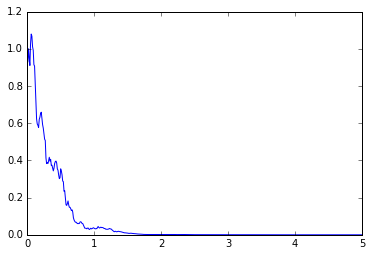

In [7]:
#program with any g(x)
import numpy as np
import math
import itertools
import random 
from matplotlib import pyplot as plt
import scipy
import time

def q(x):
    return -2*x

def g(x):
    return x


# variables for gh
tau= 0.005
h= 0.01
nsteps=np.int(5/h)
alpha = h_sqrt = np.sqrt(h)
p = np.exp(-h/tau)
beta = tau * (p - 1) / h_sqrt
gamma = np.sqrt(tau/2 * (1 - p**2) - beta**2)

t=0
x=1
a_old=0
b_old=np.sqrt(0.5*tau)*(p-1)*np.random.normal()
gh_old=0

traj=np.zeros(nsteps)
time=np.zeros(nsteps)
for i in range(nsteps):
    u=np.random.normal()
    a=h_sqrt*u
    b=beta*u+gamma*np.random.normal()
    gh=p*(gh_old-a_old)+a-b_old+b
    a_old=a
    b_old=b
    gh_old=gh
    k=h*q(x)+gh*g(x)
    x=x+0.5*(k+h*q(x+k)+gh*g(x+k))
    t=t+h
    traj[i]=x
    time[i]=t
    
plt.plot(time,traj)
plt.show()
    



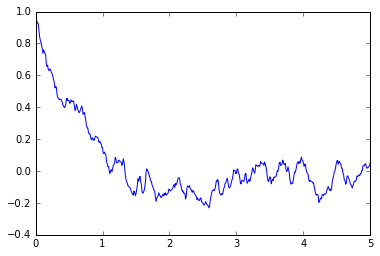

In [5]:
#program with g(x)=1
import numpy as np
import math
import itertools
import random 
from matplotlib import pyplot as plt
import scipy
import time

def q(x):
    return -2*x

g =np.sqrt(0.05) # sqrt(D)g(x)

# variables for gh
tau= 0.005
h= 0.01
nsteps=np.int(5/h)
alpha = h_sqrt = np.sqrt(h)
p = np.exp(-h/tau)
beta = tau * (p - 1) / h_sqrt
gamma = np.sqrt(tau/2 * (1 - p**2) - beta**2)

t=0
x=1
a_old=0
b_old=np.sqrt(0.5*tau)*(p-1)*np.random.normal()
gh_old=0

traj=np.zeros(nsteps)
time=np.zeros(nsteps)
for i in range(nsteps):
    u=np.random.normal()
    a=h_sqrt*u
    b=beta*u+gamma*np.random.normal()
    gh=p*(gh_old-a_old)+a-b_old+b
    a_old=a
    b_old=b
    gh_old=gh
    k=h*q(x)+gh*g
    x=x+0.5*(k+h*q(x+k)+gh*g)
    t=t+h
    traj[i]=x
    time[i]=t
    
plt.plot(time,traj)
plt.show()
    



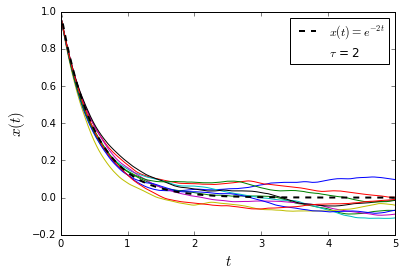

In [134]:
#exercice b
g =np.sqrt(0.05) # sqrt(D)g(x)

# variables for gh
tau= 2
h= 0.01
nsteps=np.int(5/h)
numtraj=10
alpha = h_sqrt = np.sqrt(h)
p = np.exp(-h/tau)
beta = tau * (p - 1) / h_sqrt
gamma = np.sqrt(tau/2 * (1 - p**2) - beta**2)




time=np.zeros(nsteps)
for i in range(nsteps):
    time[i]=h*i

for k in range(numtraj):
    traj=np.zeros(nsteps)
    t=0
    x=1
    a_old=0
    b_old=np.sqrt(0.5*tau)*(p-1)*np.random.normal()
    gh_old=0

    for i in range(nsteps):
        u=np.random.normal()
        a=h_sqrt*u
        b=beta*u+gamma*np.random.normal()
        gh=p*(gh_old-a_old)+a-b_old+b
        a_old=a
        b_old=b
        gh_old=gh
        k=h*q(x)+gh*g
        x=x+0.5*(k+h*q(x+k)+gh*g)
        t=t+h
        traj[i]=x
    
    plt.plot(time,traj)


plt.xlabel(r'$t$', fontsize=15)
plt.ylabel(r'$x(t)$', fontsize=15)
plt.plot(time, np.exp(-2*time),'k--',linewidth=2, label=r'$x(t)=e^{-2t}$')
plt.legend(fontsize=15)
plt.plot([],[], color='white',label=r'$\tau$ = 2')
plt.legend()
plt.show()
    



0.04964663698086679
0.008575324774337957
0.0024050450724958966
0.0


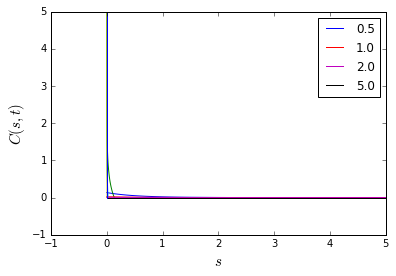

In [48]:
#correlation times and correl function

g =np.sqrt(0.05) # sqrt(D)g(x)

# variables for gh
tau= 0.5
h= 0.01
nsteps=np.int(5/h)
numtraj=1000
alpha = h_sqrt = np.sqrt(h)
p = np.exp(-h/tau)
beta = tau * (p - 1) / h_sqrt
gamma = np.sqrt(tau/2 * (1 - p**2) - beta**2)




time=np.zeros(nsteps)
for i in range(nsteps):
    time[i]=h*i

traj=np.zeros((numtraj,nsteps))
for i in range(numtraj):
    t=0
    x=1
    a_old=0
    b_old=np.sqrt(0.5*tau)*(p-1)*np.random.normal()
    gh_old=0

    for j in range(nsteps):
        u=np.random.normal()
        a=h_sqrt*u
        b=beta*u+gamma*np.random.normal()
        gh=p*(gh_old-a_old)+a-b_old+b
        a_old=a
        b_old=b
        gh_old=gh
        k=h*q(x)+gh*g
        x=x+0.5*(k+h*q(x+k)+gh*g)
        t=t+h
        traj[i][j]=x
    

tstep=[50,100,200,500] #correspond to times 0.5,1,2,5
s=np.linspace(0,5,100)
for l in range(4):
    Corr=np.zeros(100)
    for m in range(100):
        suma=0
        for p in range(numtraj):
            if tstep[l]+5*m <nsteps:
                suma+=traj[p][tstep[l]-1]*traj[p][tstep[l]+5*m] #increase of 0.05 in s is increase of 5 timesteps
        Corr[m]=suma/numtraj
    plt.plot(s,Corr, label=tstep[l]*0.01)
    plt.plot(Corr,s)
    print(Corr[0]*1/np.e)



plt.ylabel(r'$C(s,t)$', fontsize=15)
plt.xlabel(r'$s$', fontsize=15)
plt.legend()
plt.show()

    


    



0.04894530902527462
0.007126400394264169
0.0009547980540088933
0.0


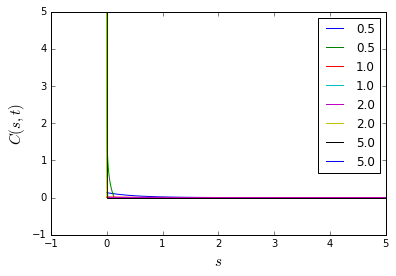

In [107]:
#correlation times and correl function

g =np.sqrt(0.05) # sqrt(D)g(x)

# variables for gh
tau= 2
h= 0.01
nsteps=np.int(5/h)
numtraj=1000
alpha = h_sqrt = np.sqrt(h)
p = np.exp(-h/tau)
beta = tau * (p - 1) / h_sqrt
gamma = np.sqrt(tau/2 * (1 - p**2) - beta**2)




time=np.zeros(nsteps)
for i in range(nsteps):
    time[i]=h*i

traj=np.zeros((numtraj,nsteps))
for i in range(numtraj):
    t=0
    x=1
    a_old=0
    b_old=np.sqrt(0.5*tau)*(p-1)*np.random.normal()
    gh_old=0

    for j in range(nsteps):
        u=np.random.normal()
        a=h_sqrt*u
        b=beta*u+gamma*np.random.normal()
        gh=p*(gh_old-a_old)+a-b_old+b
        a_old=a
        b_old=b
        gh_old=gh
        k=h*q(x)+gh*g
        x=x+0.5*(k+h*q(x+k)+gh*g)
        t=t+h
        traj[i][j]=x
    

tstep=[50,100,200,500] #correspond to times 0.5,1,2,5
s=np.linspace(0,5,100)
for l in range(4):
    Corr=np.zeros(100)
    for m in range(100):
        suma=0
        for p in range(numtraj):
            if tstep[l]+5*m <nsteps:
                suma+=traj[p][tstep[l]-1]*traj[p][tstep[l]+5*m] #increase of 0.05 in s is increase of 5 timesteps
        Corr[m]=suma/numtraj
    plt.plot(s,Corr, label=tstep[l]*0.01)
    plt.plot(Corr,s, label=tstep[l]*0.01)
    print(Corr[0]*1/np.e)
    



plt.ylabel(r'$C(s,t)$', fontsize=15)
plt.xlabel(r'$s$', fontsize=15)
plt.legend()
plt.show()

    


    



0.052381889192631516
0.010702954461522638
0.004472183424003772
0.0


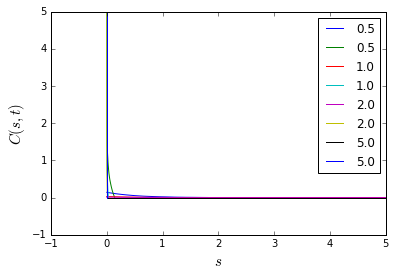

In [108]:

g =np.sqrt(0.05) # sqrt(D)g(x)

# variables for gh
tau= 0.05
h= 0.01
nsteps=np.int(5/h)
numtraj=1000
alpha = h_sqrt = np.sqrt(h)
p = np.exp(-h/tau)
beta = tau * (p - 1) / h_sqrt
gamma = np.sqrt(tau/2 * (1 - p**2) - beta**2)




time=np.zeros(nsteps)
for i in range(nsteps):
    time[i]=h*i

traj=np.zeros((numtraj,nsteps))
for i in range(numtraj):
    t=0
    x=1
    a_old=0
    b_old=np.sqrt(0.5*tau)*(p-1)*np.random.normal()
    gh_old=0

    for j in range(nsteps):
        u=np.random.normal()
        a=h_sqrt*u
        b=beta*u+gamma*np.random.normal()
        gh=p*(gh_old-a_old)+a-b_old+b
        a_old=a
        b_old=b
        gh_old=gh
        k=h*q(x)+gh*g
        x=x+0.5*(k+h*q(x+k)+gh*g)
        t=t+h
        traj[i][j]=x
    

tstep=[50,100,200,500] #correspond to times 0.5,1,2,5
s=np.linspace(0,5,100)
for l in range(4):
    Corr=np.zeros(100)
    for m in range(100):
        suma=0
        for p in range(numtraj):
            if tstep[l]+5*m <nsteps:
                suma+=traj[p][tstep[l]-1]*traj[p][tstep[l]+5*m] #increase of 0.05 in s is increase of 5 timesteps
        Corr[m]=suma/numtraj
    plt.plot(s,Corr, label=tstep[l]*0.01)
    plt.plot(Corr,s, label=tstep[l]*0.01)
    print(Corr[0]*1/np.e)
    



plt.ylabel(r'$C(s,t)$', fontsize=15)
plt.xlabel(r'$s$', fontsize=15)
plt.legend()
plt.show()

    


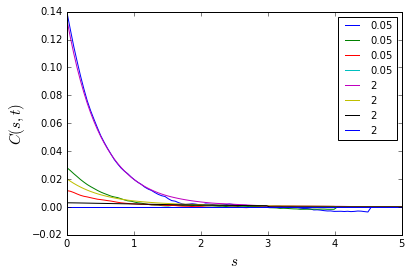

In [104]:
tstep=[50,100,200,500]#correspond to times 0.5,1,2,5
taus=[0.05,2]
s=np.linspace(0,5,100)
h= 0.01
g =np.sqrt(0.05) # sqrt(D)g(x) 
nsteps=np.int(5/h)
numtraj=1000
alpha = h_sqrt = np.sqrt(h)

for k in range(2):
    traj=np.zeros((numtraj,nsteps))
    tau= taus[k]
    p = np.exp(-h/tau)
    beta = tau * (p - 1) / h_sqrt
    gamma = np.sqrt(tau/2 * (1 - p**2) - beta**2)


    for i in range(numtraj):
        t=0
        x=1
        a_old=0
        b_old=np.sqrt(0.5*tau)*(p-1)*np.random.normal()
        gh_old=0

        for j in range(nsteps):
            u=np.random.normal()
            a=h_sqrt*u
            b=beta*u+gamma*np.random.normal()
            gh=p*(gh_old-a_old)+a-b_old+b
            a_old=a
            b_old=b
            gh_old=gh
            k=h*q(x)+gh*g
            x=x+0.5*(k+h*q(x+k)+gh*g)
            t=t+h
            traj[i][j]=x
    
    
    
    for l in range(4):
        Corr=np.zeros(100)
        for m in range(100):
            suma=0
            for p in range(numtraj):
                if tstep[l]+5*m <nsteps:
                    suma+=traj[p][tstep[l]-1]*traj[p][tstep[l]+5*m] #increase of 0.05 in s is increase of 5 timesteps
            Corr[m]=suma/numtraj
        plt.plot(s,Corr, label=tau)
        



    plt.ylabel(r'$C(s,t)$', fontsize=15)
    plt.xlabel(r'$s$', fontsize=15)
    plt.legend(fontsize=10)

plt.show()

In [101]:
step=[50,100,200,500]#correspond to times 0.5,1,2,5
taus=[0.05,2]
s=np.linspace(0,5,100)
h= 0.01
g =np.sqrt(0.05) # sqrt(D)g(x) 
nsteps=np.int(5/h)
numtraj=10
alpha = h_sqrt = np.sqrt(h)
Corr=np.zeros((2,100))
for k in range(2):
    traj=np.zeros((numtraj,nsteps))
    tau= taus[k]
    p = np.exp(-h/tau)
    beta = tau * (p - 1) / h_sqrt
    gamma = np.sqrt(tau/2 * (1 - p**2) - beta**2)


    for i in range(numtraj):
        t=0
        x=1
        a_old=0
        b_old=np.sqrt(0.5*tau)*(p-1)*np.random.normal()
        gh_old=0

        for j in range(nsteps):
            u=np.random.normal()
            a=h_sqrt*u
            b=beta*u+gamma*np.random.normal()
            gh=p*(gh_old-a_old)+a-b_old+b
            a_old=a
            b_old=b
            gh_old=gh
            k=h*q(x)+gh*g
            x=x+0.5*(k+h*q(x+k)+gh*g)
            t=t+h
            traj[i][j]=x
    
    
    
    for l in range(4):
        for m in range(100):
            suma=0
            for p in range(numtraj):
                if tstep[l]+5*m <nsteps:
                    suma+=traj[p][tstep[l]-1]*traj[p][tstep[l]+5*m] #increase of 0.05 in s is increase of 5 timesteps
            Corr[k][m]=suma/numtraj
    
        plt.plot(s,Corr)
        



    plt.ylabel(r'$C(s,t)$', fontsize=15)
    plt.xlabel(r'$s$', fontsize=15)
    plt.legend([0.05,2])

plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

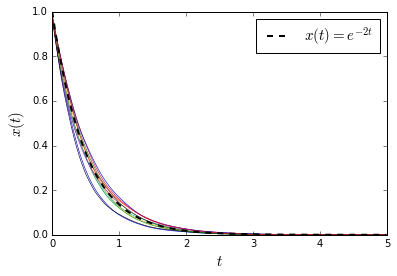

In [60]:
#exercice b
def g(x):
    return np.sqrt(0.05)*x

# variables for gh
tau= 0.5
h= 0.01
nsteps=np.int(5/h)
numtraj=10
alpha = h_sqrt = np.sqrt(h)
p = np.exp(-h/tau)
beta = tau * (p - 1) / h_sqrt
gamma = np.sqrt(tau/2 * (1 - p**2) - beta**2)




time=np.zeros(nsteps)
for i in range(nsteps):
    time[i]=h*i

for k in range(numtraj):
    traj=np.zeros(nsteps)
    t=0
    x=1
    a_old=0
    b_old=np.sqrt(0.5*tau)*(p-1)*np.random.normal()
    gh_old=0

    for i in range(nsteps):
        u=np.random.normal()
        a=h_sqrt*u
        b=beta*u+gamma*np.random.normal()
        gh=p*(gh_old-a_old)+a-b_old+b
        a_old=a
        b_old=b
        gh_old=gh
        k=h*q(x)+gh*g(x)
        x=x+0.5*(k+h*q(x+k)+gh*g(x+k))
        t=t+h
        traj[i]=x
    
    plt.plot(time,traj, linewidth=0.6)


plt.xlabel(r'$t$', fontsize=15)
plt.ylabel(r'$x(t)$', fontsize=15)
plt.plot(time, np.exp(-2*time),'k--',linewidth=2, label=r'$x(t)=e^{-2t}$')
plt.legend(fontsize=15)
plt.show()
    

